In [36]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

train = pd.read_csv("/content/gdrive/MyDrive/movielens/ua.base", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/MyDrive/movielens/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

In [57]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [59]:
rank = 10
numItems = items.max()+1
numUsers = users.max()+1

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

lambda1 = 0.0001
lambda2 = 0.0001

optimizer = torch.optim.Adam([P, Q], lr=0.1)

X = []
Y = []
Y_test = []
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  cost = F.mse_loss(hypothesis, ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2)


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost)

    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
    if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}, cost_test: {:.6f}".format(epoch, cost.item(), cost_test.item()))


epoch: 0, cost: 24.004742, cost_test: 21.975288
epoch: 100, cost: 0.697990, cost_test: 1.053040
epoch: 200, cost: 0.641778, cost_test: 1.057497
epoch: 300, cost: 0.631332, cost_test: 1.060594
epoch: 400, cost: 0.628858, cost_test: 1.060799
epoch: 500, cost: 0.627987, cost_test: 1.060025
epoch: 600, cost: 0.627573, cost_test: 1.059292
epoch: 700, cost: 0.627249, cost_test: 1.058602
epoch: 800, cost: 0.626887, cost_test: 1.057687
epoch: 900, cost: 0.626603, cost_test: 1.056729


In [60]:
# bias 추가
rank = 10
numItems = items.max()+1
numUsers = users.max()+1

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)

lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.0001
lambda4 = 0.0001

mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)

X = []
Y = []
Y_test = []
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis, ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost)

    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
    if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}, cost_test: {:.6f}".format(epoch, cost.item(), cost_test.item()))


epoch: 0, cost: 13.619315, cost_test: 10.423199
epoch: 100, cost: 0.610770, cost_test: 0.870522
epoch: 200, cost: 0.579116, cost_test: 0.867095
epoch: 300, cost: 0.575301, cost_test: 0.869769
epoch: 400, cost: 0.573569, cost_test: 0.868973
epoch: 500, cost: 0.572724, cost_test: 0.868289
epoch: 600, cost: 0.572420, cost_test: 0.868367
epoch: 700, cost: 0.572303, cost_test: 0.868410
epoch: 800, cost: 0.572257, cost_test: 0.868466
epoch: 900, cost: 0.572241, cost_test: 0.868526


In [62]:
# 파라미터 변경
rank = 10
numItems = items.max()+1
numUsers = users.max()+1

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)

lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.00005
lambda4 = 0.00005

mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)

X = []
Y = []
Y_test = []
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis, ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost)

    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
    if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}, cost_test: {:.6f}".format(epoch, cost.item(), cost_test.item()))


epoch: 0, cost: 13.127260, cost_test: 10.312820
epoch: 100, cost: 0.599406, cost_test: 0.876680
epoch: 200, cost: 0.575637, cost_test: 0.868465
epoch: 300, cost: 0.571720, cost_test: 0.867214
epoch: 400, cost: 0.570216, cost_test: 0.867390
epoch: 500, cost: 0.569069, cost_test: 0.867463
epoch: 600, cost: 0.568406, cost_test: 0.866416
epoch: 700, cost: 0.568179, cost_test: 0.865110
epoch: 800, cost: 0.568083, cost_test: 0.864081
epoch: 900, cost: 0.568022, cost_test: 0.863415


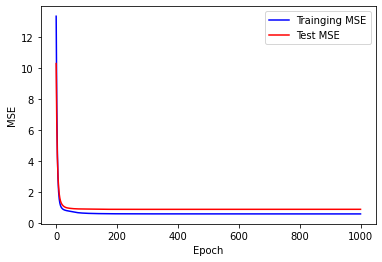

In [70]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X, Y, c="blue", label="Trainging MSE")
plt.plot(X, Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()